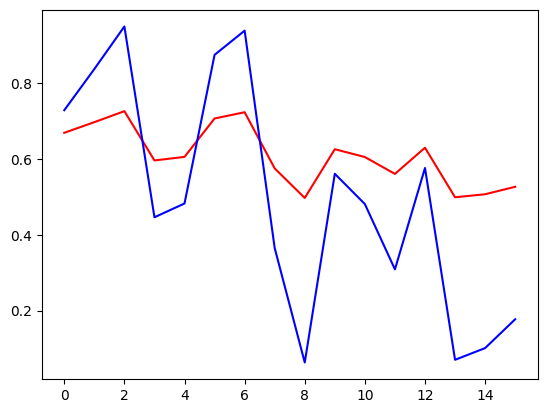

In [1]:
from random import random
from math import log2
import matplotlib.pyplot as plt

seed = []
for _ in range(0, 16):
    seed.append(random())


def perlin_noise(scale_factor, seed, pitch_size, x):
    if pitch_size >= len(seed):
        sample = seed[0]
    else:
        sample = (seed[x] + seed[pitch_size]) / 2

    if pitch_size < 1:
        return scale_factor * sample
    else:
        return (scale_factor * sample) + \
            perlin_noise(scale_factor/2, seed, int(pitch_size / 2), x)


halved = int(log2(len(seed)))
scale_total = 0
for i in range(0, halved):
    scale_total += 2**-i

perlin_values = []
for i in range(0, len(seed)):
    perlin_values.append((perlin_noise(1, seed, len(seed), i)) / scale_total)

perlin_line = plt.plot(perlin_values)
plt.setp(perlin_line, color="r", label="Perlin Values")
seed_line = plt.plot(seed)
plt.setp(seed_line, color="b", label="Seed ")
plt.show()
